In [13]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_asd_data_with_pandas(data_path: str = "/content/drive/MyDrive/Antibody_Chekalin_Denis/asd") -> pd.DataFrame:
    """
    Загружает все parquet файлы из папки asd в один pandas DataFrame

    Args:
        data_path: путь к папке с данными

    Returns:
        pd.DataFrame: объединенный DataFrame со всеми данными
    """
    # Получаем все parquet файлы из папки
    parquet_files = glob.glob(os.path.join(data_path, "part-*.parquet"))

    if not parquet_files:
        raise ValueError(f"Не найдено parquet файлов в папке {data_path}")

    print(f"Найдено {len(parquet_files)} parquet файлов")

    # Загружаем все файлы в список DataFrame'ов
    dataframes = []
    for file_path in parquet_files:
        # print(f"Загружаем файл: {os.path.basename(file_path)}")
        df = pd.read_parquet(file_path)
        dataframes.append(df)

    # Объединяем все DataFrame'ы в один
    combined_df = pd.concat(dataframes, ignore_index=True)

    print(f"Общий размер данных: {combined_df.shape}")
    print(f"Колонки: {list(combined_df.columns)}")

    return combined_df

# Загружаем данные
agab_df = load_asd_data_with_pandas('../asd')

Найдено 20 parquet файлов
Общий размер данных: (1227083, 11)
Колонки: ['dataset', 'heavy_sequence', 'light_sequence', 'scfv', 'affinity_type', 'affinity', 'antigen_sequence', 'confidence', 'nanobody', 'metadata', 'processed_measurement']


#### Распределение длины light_sequence

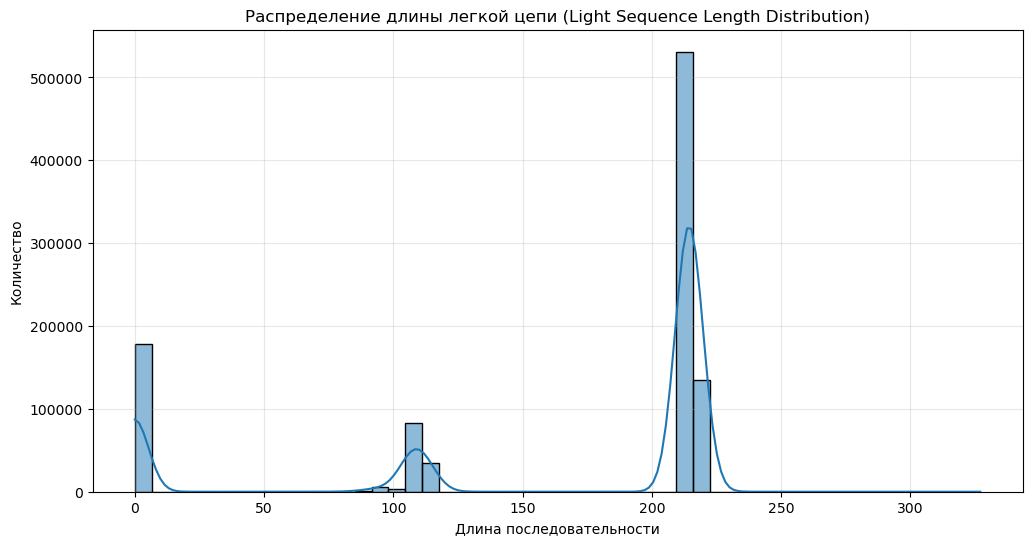

Минимальная длина: 0.0
Максимальная длина: 327.0
Медианная длина: 214.0
Средняя длина: 161.20


In [16]:
# Вычисляем длины light_sequence, исключая scfv
light_lengths = agab_df['light_sequence'][agab_df['scfv'] == False].str.len()

# Строим график
plt.figure(figsize=(12, 6))
sns.histplot(light_lengths, bins=20, kde=True)
plt.title('Распределение длины легкой цепи (Light Sequence Length Distribution)')
plt.xlabel('Длина последовательности')
plt.ylabel('Количество')
plt.grid(True, alpha=0.3)
plt.show()

# Выводим основные статистики
print(f"Минимальная длина: {light_lengths.min()}")
print(f"Максимальная длина: {light_lengths.max()}")
print(f"Медианная длина: {light_lengths.median()}")
print(f"Средняя длина: {light_lengths.mean():.2f}")

#### no_light_sequence

In [22]:
no_light_sequence = agab_df[
    (agab_df['light_sequence'].str.len() == 0)
    & (agab_df['nanobody'] == False)
    & (agab_df['scfv'] == False)
]
no_light_sequence.shape

(109393, 11)

In [23]:
no_light_sequence.dataset.value_counts()

dataset
covid-19    54625
hiv         48008
met          4000
biomap       2725
aae            35
Name: count, dtype: int64

#### Длина light_sequence > 200

Количество записей с длиной Light Chain > 200: 666638


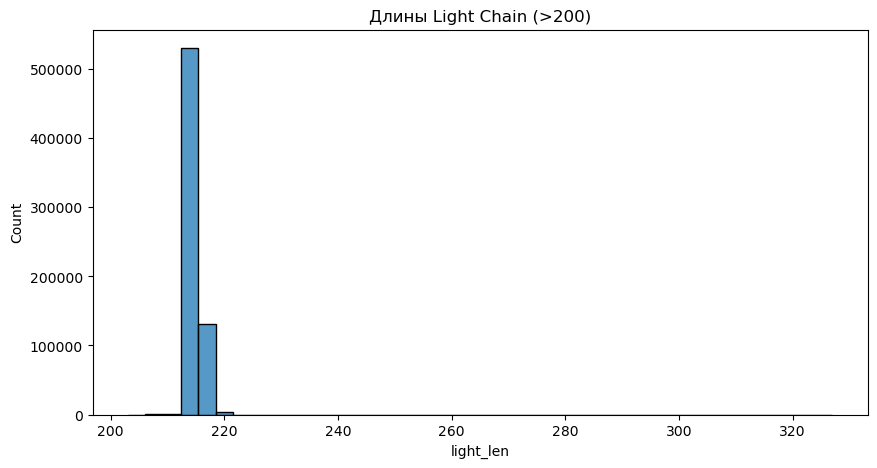

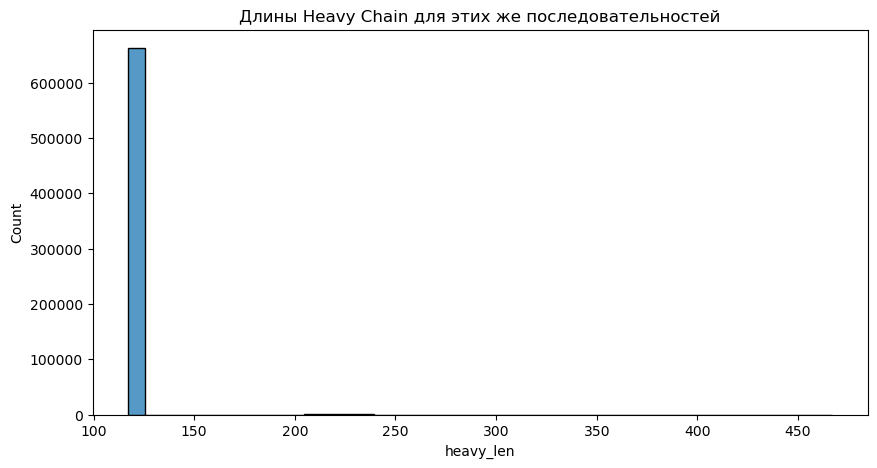

,dataset,heavy_sequence,light_sequence,scfv,affinity_type,affinity,antigen_sequence,confidence,nanobody,metadata,processed_measurement,light_len,heavy_len
370721,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,h,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",h,214,120
805089,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,l,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",l,214,120
999917,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,l,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",l,214,120
735768,buzz,EVQLVESGGGLVQPGGSLRLSCAASGFNIKDTYIHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDVNTAVAWYQQKPGKAPKL...,False,fuzzy,m,TQVCTGTDMKLRLPASPETHLDMLRHLYQGCQVVQGNLELTYLPTN...,very_high,False,"{'target_name': 'human her2', 'target_pdb': '1...",m,214,120
960591,abbd,QVQLVQSGAEVKKPGSSVKVSCKASGGTFSNYAISWVRQAPGQGLE...,QSALTQPPAVSGTPGQRVTISCSGSDSNIGRRSVNWYQQFPGTAPK...,False,-log KD,8.422880371352381,ADPGDQICIGYHANNSTEQVDTIMEKNVTVTHAQDILEKKHNGKLC...,high,False,"{'target_name': '', 'target_pdb': '4fqi', 'tar...",7.2114401856761905,216,121


In [30]:
# Фильтрация: подозрительно длинные light chain
long_light = agab_df[
    agab_df['light_sequence'].notna() &
    (agab_df['light_sequence'].str.len() > 200)
]

print("Количество записей с длиной Light Chain > 200:", len(long_light))

# Добавляем длины для анализа
long_light = long_light.assign(
    light_len=long_light['light_sequence'].str.len(),
    heavy_len=long_light['heavy_sequence'].str.len()
)

# Гистограммы длин
plt.figure(figsize=(10, 5))
sns.histplot(long_light['light_len'], bins=40)
plt.title("Длины Light Chain (>200)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(long_light['heavy_len'], bins=40)
plt.title("Длины Heavy Chain для этих же последовательностей")
plt.show()

# Показываем примерные строки
display(long_light.sample(5))

In [27]:
long_light.dataset.value_counts()

dataset
buzz                     524346
abbd                     138268
structures-antibodies      2482
abdesign                    576
dlgo                        360
skempiv2                    353
ab-bind                     253
Name: count, dtype: int64